In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

Завантажуємо датасет сifar_10.

x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


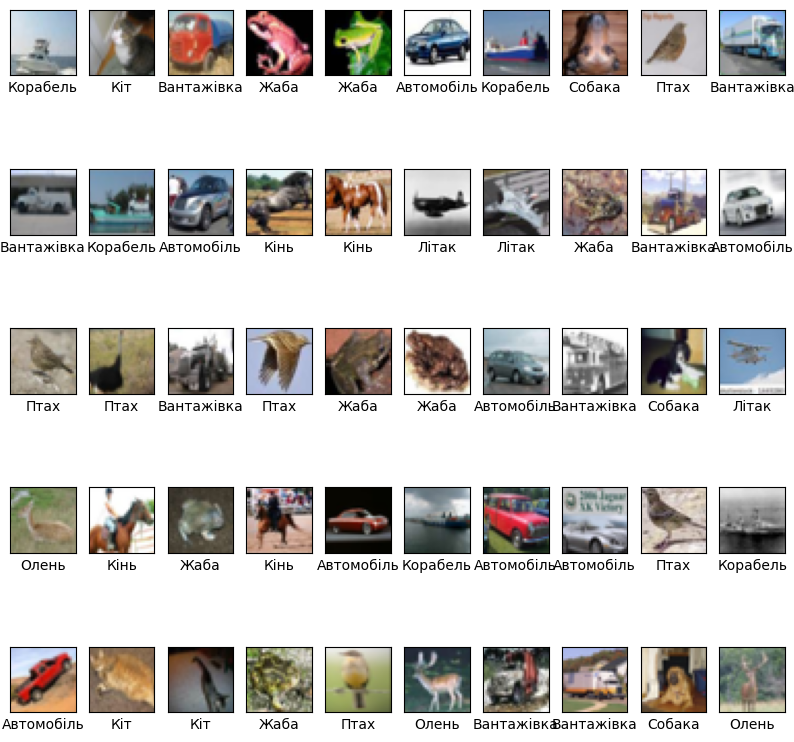

In [40]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

classes = ["Літак", "Автомобіль", "Птах", "Кіт", "Олень", "Собака", "Жаба", "Кінь", "Корабель", "Вантажівка"]


plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

    
    class_index = int(y_train[i])
    
    plt.xlabel(classes[class_index])



Розділяємо датасет cifar_10 на набори(тренувальний та тестовий)

In [41]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

Створюємо нейронну мережу.

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [43]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [45]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 14s 21ms/step - loss: 1.6648 - accuracy: 0.3885 - val_loss: 1.4507 - val_accuracy: 0.4741
Epoch 2/10
625/625 [==============================] - 14s 23ms/step - loss: 1.3051 - accuracy: 0.5342 - val_loss: 1.2648 - val_accuracy: 0.5574
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 1.1443 - accuracy: 0.5963 - val_loss: 1.1096 - val_accuracy: 0.6106
Epoch 4/10
625/625 [==============================] - 14s 22ms/step - loss: 1.0431 - accuracy: 0.6334 - val_loss: 1.0473 - val_accuracy: 0.6354
Epoch 5/10
625/625 [==============================] - 14s 23ms/step - loss: 0.9706 - accuracy: 0.6611 - val_loss: 1.0214 - val_accuracy: 0.6423
Epoch 6/10
625/625 [==============================] - 13s 22ms/step - loss: 0.9098 - accuracy: 0.6827 - val_loss: 1.0161 - val_accuracy: 0.6488
Epoch 7/10
625/625 [==============================] - 14s 22ms/step - loss: 0.8653 - accuracy: 0.6959 - val_loss: 0.9552 - val_accuracy:

Графік функції

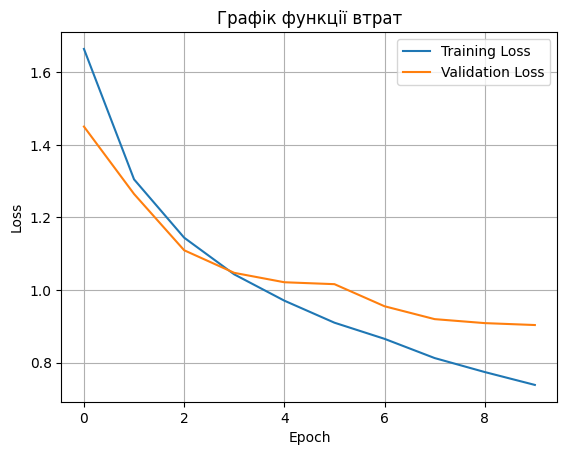

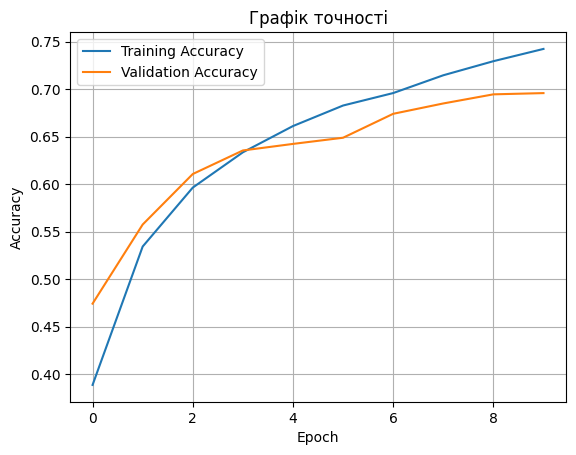

In [46]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()



In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 [==============================] - 1s 4ms/step - loss: 1.0260 - accuracy: 0.7051
Test accuracy: 0.7050999999046326
Test loss: 1.025989055633545


In [38]:
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images)

1/1 [==============================] - 0s 70ms/step


In [47]:
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

Image 1: Predicted Class 5, True Class 5
Image 2: Predicted Class 0, True Class 0
Image 3: Predicted Class 3, True Class 3
Image 4: Predicted Class 6, True Class 6
Image 5: Predicted Class 7, True Class 7
Image 6: Predicted Class 4, True Class 9
Image 7: Predicted Class 8, True Class 8
Image 8: Predicted Class 3, True Class 9
Image 9: Predicted Class 9, True Class 9
Image 10: Predicted Class 1, True Class 1


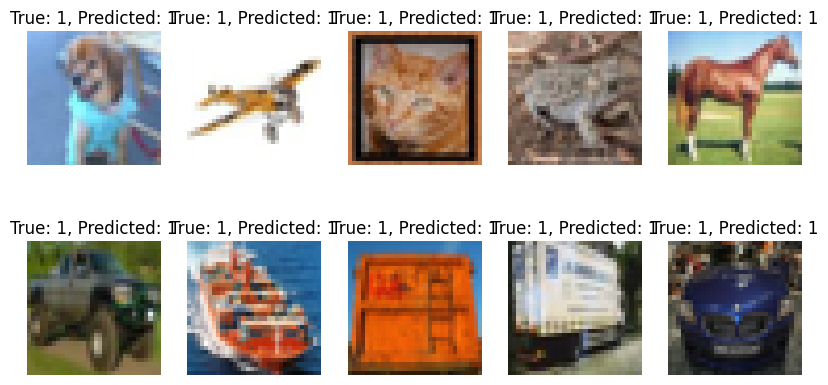

In [48]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

Висновок: в ході практичної роботи я розробив згорткову нейронну мережу для розпізнавання зображень датасету cifar_10. Підібрав оптимальну кількість шарів, функції активації кількість епох. Побудував графіки та візуалізував результати.